# IMPORTACIÓN DE LOS DATOS

In [9]:
import pandas as pd

# Especifica la ruta del archivo CSV
file_path = 'documents/tesis/df_mora_prestamos2.csv'

In [23]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame
# Si no has cargado el DataFrame, puedes hacerlo de la siguiente manera:
# df_mora_prestamos = pd.read_csv('tu_archivo.csv')

# Contar la cantidad de registros y variables
num_registros = df_mora_prestamos.shape[0]  # Número de filas
num_variables = df_mora_prestamos.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1622022
Cantidad de variables: 35


# REGRESIÓN LOGÍSTICA

#### TECNICAS DE BALANCEO EN CONJUNTO DE ENTRENAMIENTO Y COMPARACION DE RESULTADOS


Medidas de rendimiento para Sin Balanceo (class_weight):
ROC-AUC: 0.9885
Precision: 0.6055
Recall: 0.9579
F1-Score: 0.7420
Accuracy: 0.9621

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9974  0.9623    0.9795  458900.0000
1                0.6055  0.9579    0.7420   27707.0000
accuracy         0.9621  0.9621    0.9621       0.9621
macro avg        0.8014  0.9601    0.8608  486607.0000
weighted avg     0.9751  0.9621    0.9660  486607.0000


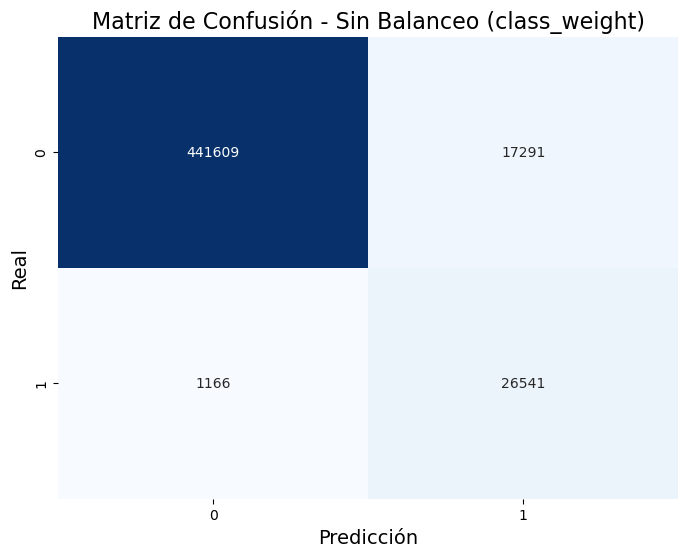

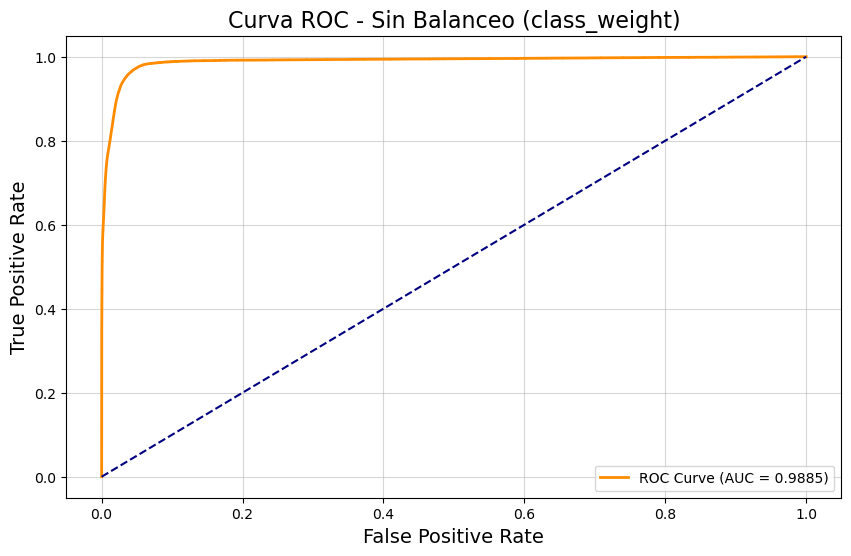


Medidas de rendimiento para SMOTE:
ROC-AUC: 0.9883
Precision: 0.6192
Recall: 0.9569
F1-Score: 0.7519
Accuracy: 0.9640

Reporte de Clasificación:
              precision  recall  f1-score     support
0                0.9973  0.9645    0.9806  458900.000
1                0.6192  0.9569    0.7519   27707.000
accuracy         0.9640  0.9640    0.9640       0.964
macro avg        0.8083  0.9607    0.8663  486607.000
weighted avg     0.9758  0.9640    0.9676  486607.000


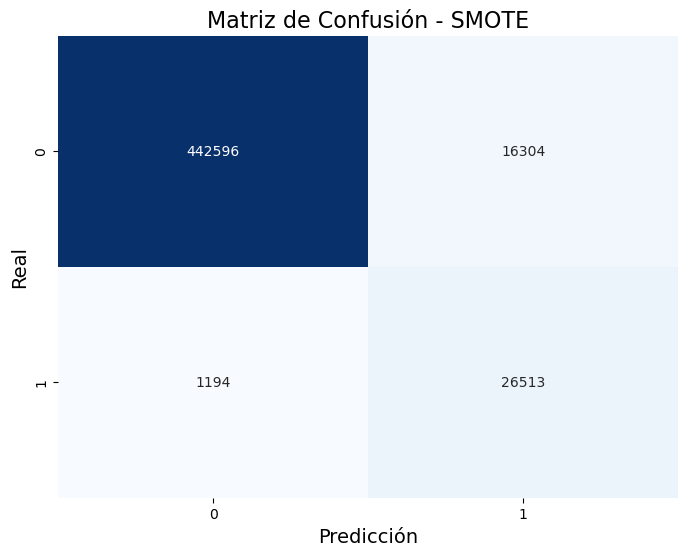

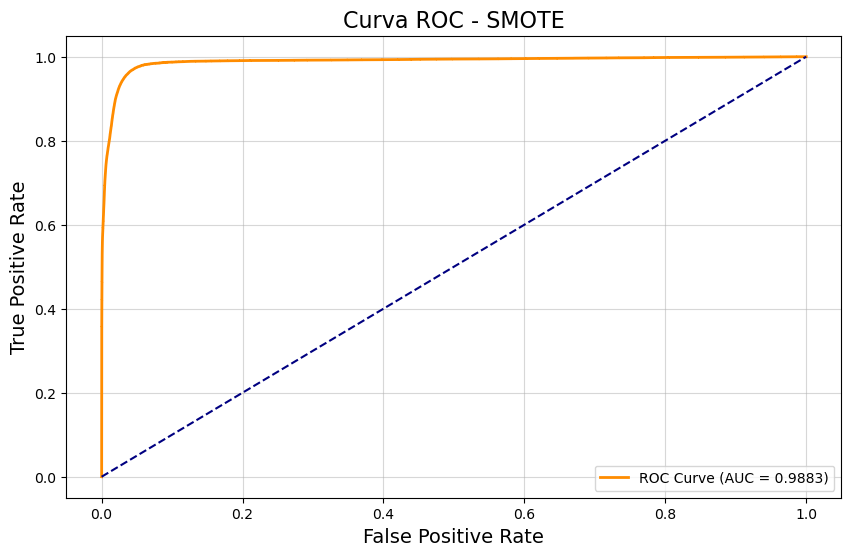


Medidas de rendimiento para SMOTE-Tomek:
ROC-AUC: 0.9883
Precision: 0.6192
Recall: 0.9569
F1-Score: 0.7519
Accuracy: 0.9640

Reporte de Clasificación:
              precision  recall  f1-score     support
0                0.9973  0.9645    0.9806  458900.000
1                0.6192  0.9569    0.7519   27707.000
accuracy         0.9640  0.9640    0.9640       0.964
macro avg        0.8083  0.9607    0.8663  486607.000
weighted avg     0.9758  0.9640    0.9676  486607.000


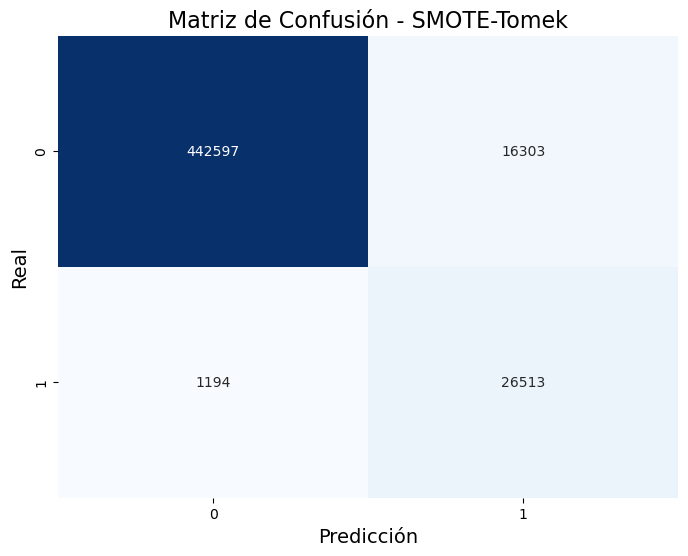

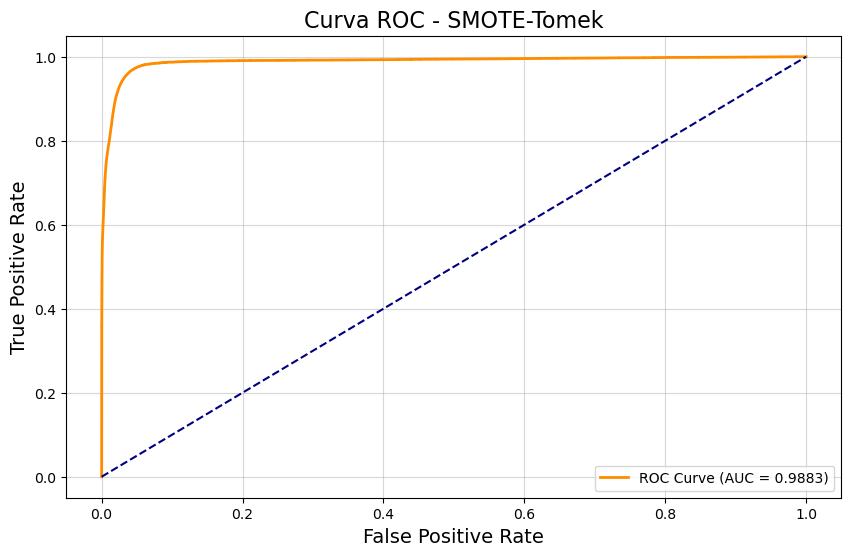


Comparativa de Técnicas de Balanceo:
                              roc_auc  precision    recall        f1  accuracy
Sin Balanceo (class_weight)  0.988544   0.605517  0.957917  0.742001  0.962070
SMOTE                        0.988322   0.619217  0.956906  0.751886  0.964041
SMOTE-Tomek                  0.988322   0.619231  0.956906  0.751897  0.964043


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc,
    f1_score, 
    accuracy_score, 
    precision_score, 
    recall_score
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Configuraciones de semilla para reproducibilidad
np.random.seed(42)

# Cargar dataset
df_mora_prestamos = pd.read_csv('documents/tesis/df_mora_prestamos2.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir el conjunto de datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Escalar características (importante para Regresión Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función para entrenar, predecir y evaluar modelo
def evaluar_modelo(X_train_balanceado, y_train_balanceado, X_test, y_test, nombre_tecnica):
    # Entrenar Regresión Logística
    clf_lr = LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'  # Compensar desbalanceo en la función de costo
    )
    clf_lr.fit(X_train_balanceado, y_train_balanceado)
    
    # Predicciones
    y_pred_lr = clf_lr.predict(X_test)
    y_pred_proba_lr = clf_lr.predict_proba(X_test)[:, 1]
    
    # Calcular métricas
    roc_auc = auc(*roc_curve(y_test, y_pred_proba_lr)[:2])
    recall = recall_score(y_test, y_pred_lr)
    precision = precision_score(y_test, y_pred_lr)
    f1 = f1_score(y_test, y_pred_lr)
    accuracy = accuracy_score(y_test, y_pred_lr)
    
    print(f"\nMedidas de rendimiento para {nombre_tecnica}:")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Reporte de Clasificación
    print("\nReporte de Clasificación:")
    reporte = classification_report(y_test, y_pred_lr, output_dict=True)
    reporte_redondeado = pd.DataFrame(reporte).transpose().round(4)
    print(reporte_redondeado)
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred_lr)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {nombre_tecnica}", fontsize=16)
    plt.xlabel("Predicción", fontsize=14)
    plt.ylabel("Real", fontsize=14)
    plt.show()
    
    # Curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="darkorange", lw=2)
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.title(f"Curva ROC - {nombre_tecnica}", fontsize=16)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.5)
    plt.show()
    
    return {
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }

# 1. Sin balanceo (modificado por class_weight='balanced')
resultados_sin_balanceo = evaluar_modelo(X_train_scaled, y_train, X_test_scaled, y_test, 'Sin Balanceo (class_weight)')

# 2. Con SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
resultados_smote = evaluar_modelo(X_train_smote, y_train_smote, X_test_scaled, y_test, 'SMOTE')

# 3. Con SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_scaled, y_train)
resultados_smote_tomek = evaluar_modelo(X_train_smote_tomek, y_train_smote_tomek, X_test_scaled, y_test, 'SMOTE-Tomek')

# Comparativa de resultados
comparativa = pd.DataFrame([
    resultados_sin_balanceo,
    resultados_smote,
    resultados_smote_tomek
], index=['Sin Balanceo (class_weight)', 'SMOTE', 'SMOTE-Tomek'])
print("\nComparativa de Técnicas de Balanceo:")
print(comparativa)

#### MEJORES HIPERPARAMETROS DE REGRESION LOGISTICA - SMOTE

C:\Users\g97rojasmf\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Mejores parámetros encontrados:
{'C': 1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


C:\Users\g97rojasmf\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


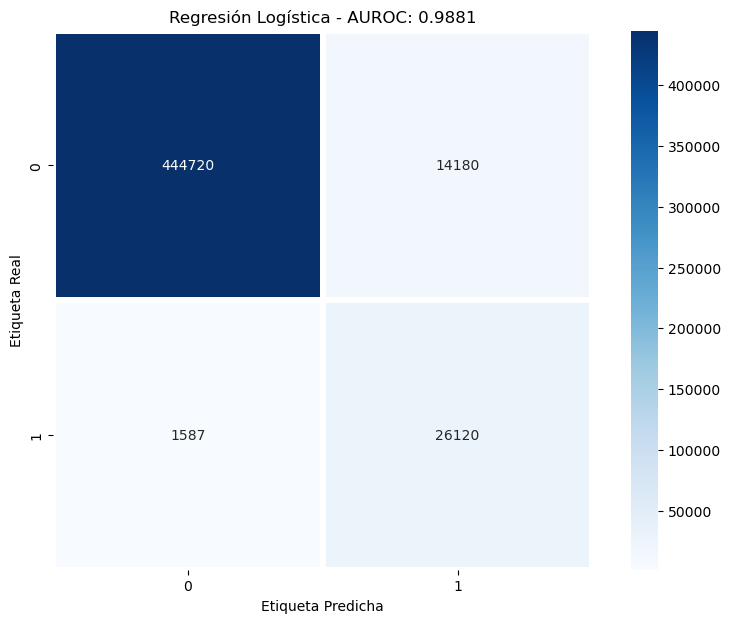


Medidas de rendimiento para Regresión Logística:
Accuracy: 0.9676
Precisión: 0.6481
Recall: 0.9427
F1-Score: 0.7682

Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9964    0.9691    0.9826    458900
           1     0.6481    0.9427    0.7682     27707

    accuracy                         0.9676    486607
   macro avg     0.8223    0.9559    0.8754    486607
weighted avg     0.9766    0.9676    0.9704    486607



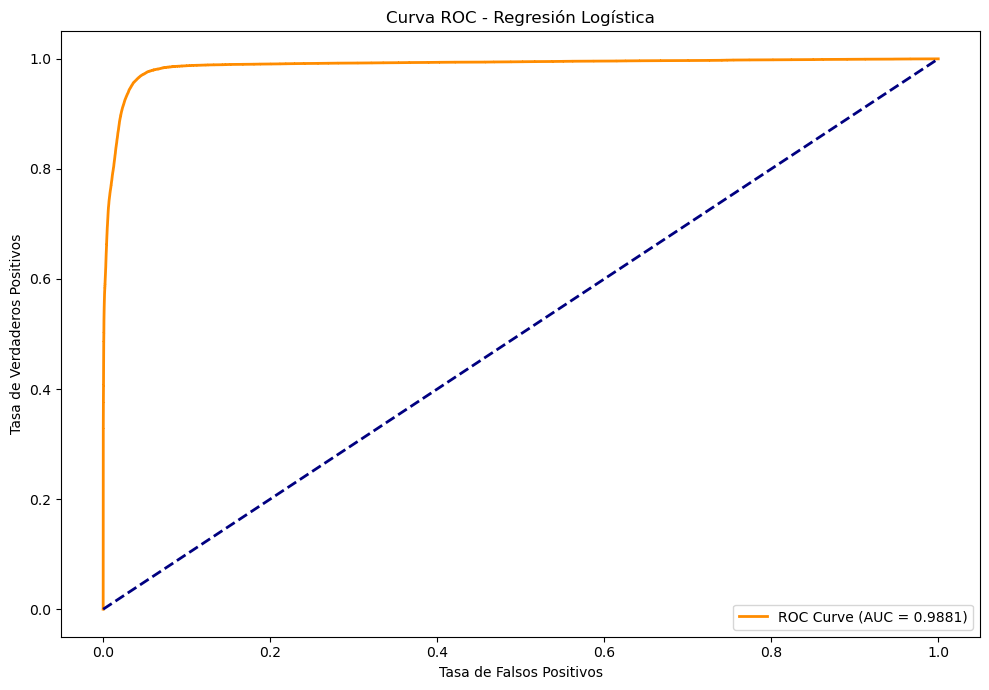

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # Asegúrate de tener imbalanced-learn instalado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
df_mora_prestamos = pd.read_csv('documents/tesis/df_mora_prestamos2.csv')

# Separar las características y la variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Definir los valores de la cuadrícula para la búsqueda de hiperparámetros
grid_values = {
    'penalty': ['l1', 'l2'],       # Tipo de penalización
    'C': [0.01, 0.1, 1, 10],      # Parámetro de regularización
    'solver': ['liblinear'],      # Algoritmo de optimización compatible con 'l1' y 'l2'
    'max_iter': [100, 200],       # Número máximo de iteraciones
    'fit_intercept': [True],      # Incluir el término de intercepción
    'class_weight': ['balanced', None]  # Ajuste de peso de clase para desbalanceo
}

# GridSearchCV para la búsqueda de hiperparámetros
clf_lr_grid = GridSearchCV(
    LogisticRegression(random_state=101, multi_class='ovr'),
    param_grid=grid_values,
    cv=10, 
    n_jobs=-1
)
clf_lr_grid.fit(X_train_smote, y_train_smote)

# Mostrar el mejor resultado
print("Mejores parámetros encontrados:")
print(clf_lr_grid.best_params_)

# Aplicar el modelo con los mejores hiperparámetros encontrados
clf_logReg = LogisticRegression(
    random_state=101, 
    multi_class='ovr', 
    solver=clf_lr_grid.best_params_['solver'], 
    class_weight=clf_lr_grid.best_params_['class_weight'],
    C=clf_lr_grid.best_params_['C'], 
    penalty=clf_lr_grid.best_params_['penalty'],
    max_iter=clf_lr_grid.best_params_['max_iter'],
    fit_intercept=clf_lr_grid.best_params_['fit_intercept']
)

# Entrenar el modelo
clf_logReg.fit(X_train_smote, y_train_smote)

# Predecir en los datos de prueba
y_pred_logReg = clf_logReg.predict(X_test)
probs_logReg = clf_logReg.predict_proba(X_test)
preds_logReg = probs_logReg[:, 1]

# Calcular ROC Curve y AUC
fpr_logReg, tpr_logReg, _ = roc_curve(y_test, preds_logReg)
roc_auc_logReg = auc(fpr_logReg, tpr_logReg)

# Mostrar la matriz de confusión
cm_logReg = confusion_matrix(y_test, y_pred_logReg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logReg, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.title(f'Regresión Logística - AUROC: {roc_auc_logReg:.4f}', size=12)
plt.show()

# Calcular métricas clave
accuracy = accuracy_score(y_test, y_pred_logReg)
precision = precision_score(y_test, y_pred_logReg)
recall = recall_score(y_test, y_pred_logReg)
f1 = f1_score(y_test, y_pred_logReg)

# Imprimir métricas con 4 decimales
print("\nMedidas de rendimiento para Regresión Logística:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_logReg, digits=4))

# Graficar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr_logReg, tpr_logReg, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_logReg:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#### MEJORES HIPERPARAMETROS DE REGRESION LOGISTICA - CROSS VALIDATION

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Cargar dataset
print("Cargando datos...")
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos2.csv')
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Mejores hiperparámetros
best_params = {
    'C': 1,
    'class_weight': 'balanced',
    'fit_intercept': True,
    'max_iter': 100,
    'penalty': 'l1',
    'solver': 'liblinear',
    'random_state': 42
}

# Preparar KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar resultados
train_scores = []
val_scores = []

print(f"Iniciando validación cruzada con {n_splits} folds...")

# Realizar validación cruzada
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}/{n_splits}")
    
    # Dividir datos
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Escalar datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Aplicar SMOTE
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
    
    # Crear y entrenar modelo
    model = LogisticRegression(**best_params)
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predicciones
    train_pred = model.predict(X_train_scaled)
    train_pred_proba = model.predict_proba(X_train_scaled)[:, 1]
    
    val_pred = model.predict(X_val_scaled)
    val_pred_proba = model.predict_proba(X_val_scaled)[:, 1]
    
    # Calcular métricas
    train_metrics = {
        'roc_auc': roc_auc_score(y_train, train_pred_proba),
        'precision': precision_score(y_train, train_pred),
        'recall': recall_score(y_train, train_pred),
        'f1': f1_score(y_train, train_pred),
        'accuracy': accuracy_score(y_train, train_pred)
    }
    
    val_metrics = {
        'roc_auc': roc_auc_score(y_val, val_pred_proba),
        'precision': precision_score(y_val, val_pred),
        'recall': recall_score(y_val, val_pred),
        'f1': f1_score(y_val, val_pred),
        'accuracy': accuracy_score(y_val, val_pred)
    }
    
    train_scores.append(train_metrics)
    val_scores.append(val_metrics)
    
    print("\nMétricas de entrenamiento:")
    for metric, value in train_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    print("\nMétricas de validación:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")

# Calcular promedios y desviaciones estándar
train_means = pd.DataFrame(train_scores).mean()
train_stds = pd.DataFrame(train_scores).std()
val_means = pd.DataFrame(val_scores).mean()
val_stds = pd.DataFrame(val_scores).std()

# Crear DataFrame para el resumen
summary_data = {
    'Train Mean': train_means,
    'Train Std': train_stds,
    'Val Mean': val_means,
    'Val Std': val_stds,
    'Diff (Train-Val)': train_means - val_means
}

summary_df = pd.DataFrame(summary_data).round(4)

print("\nResumen de validación cruzada:")
print(summary_df)

# Guardar resultados
summary_df.to_csv('logistic_regression_cv_results.csv')

# Evaluar overfitting
print("\nEvaluación de overfitting:")
for metric in train_means.index:
    diff = train_means[metric] - val_means[metric]
    print(f"\n{metric}:")
    print(f"Diferencia Train-Val: {abs(diff):.4f}")
    if abs(diff) > 0.02:
        print("⚠️ Posible overfitting detectado")
    else:
        print("✓ No hay evidencia de overfitting")

Cargando datos...
Iniciando validación cruzada con 5 folds...

Fold 1/5

Métricas de entrenamiento:
roc_auc: 0.9884
precision: 0.6231
recall: 0.9573
f1: 0.7549
accuracy: 0.9645

Métricas de validación:
roc_auc: 0.9883
precision: 0.6154
recall: 0.9537
f1: 0.7480
accuracy: 0.9637

Fold 2/5

Métricas de entrenamiento:
roc_auc: 0.9883
precision: 0.6196
recall: 0.9562
f1: 0.7520
accuracy: 0.9642

Métricas de validación:
roc_auc: 0.9888
precision: 0.6295
recall: 0.9582
f1: 0.7598
accuracy: 0.9651

Fold 3/5

Métricas de entrenamiento:
roc_auc: 0.9884
precision: 0.6211
recall: 0.9568
f1: 0.7532
accuracy: 0.9643

Métricas de validación:
roc_auc: 0.9883
precision: 0.6216
recall: 0.9569
f1: 0.7536
accuracy: 0.9644

Fold 4/5

Métricas de entrenamiento:
roc_auc: 0.9885
precision: 0.6223
recall: 0.9571
f1: 0.7542
accuracy: 0.9645

Métricas de validación:
roc_auc: 0.9876
precision: 0.6220
recall: 0.9565
f1: 0.7538
accuracy: 0.9645

Fold 5/5

Métricas de entrenamiento:
roc_auc: 0.9883
precision: 0.620

#### MEJORES HIPERPARAMETROS DE REGRESION LOGISTICA - INCORPORACION DE NUEVOS DATOS (VALIDACIÓN)

Entrenando Regresión Logística con los mejores hiperparámetros...

Comparación de Métricas entre Dataset Prueba (Original) y Dataset Real:
     Métrica  Dataset Prueba (Original)  Dataset Real  Desvío
0   Accuracy                     0.9641        0.4360  0.5281
1  Precision                     0.6193        0.1112  0.5081
2     Recall                     0.9571        0.9918  0.0347
3   F1-Score                     0.7520        0.1999  0.5521
4    ROC-AUC                     0.9883        0.9865  0.0018


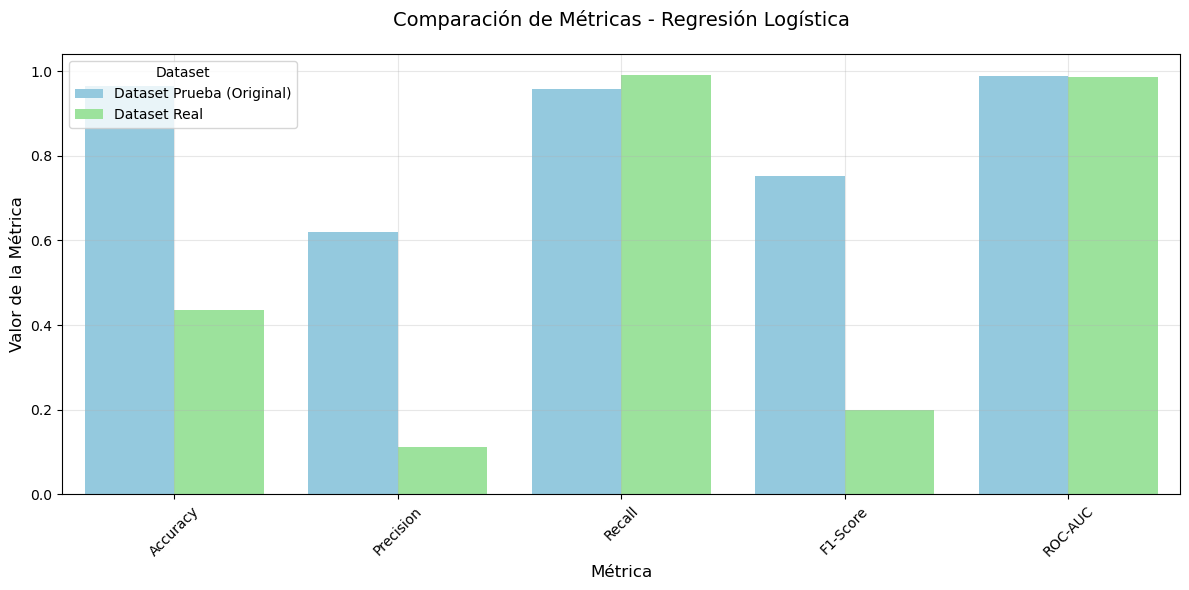

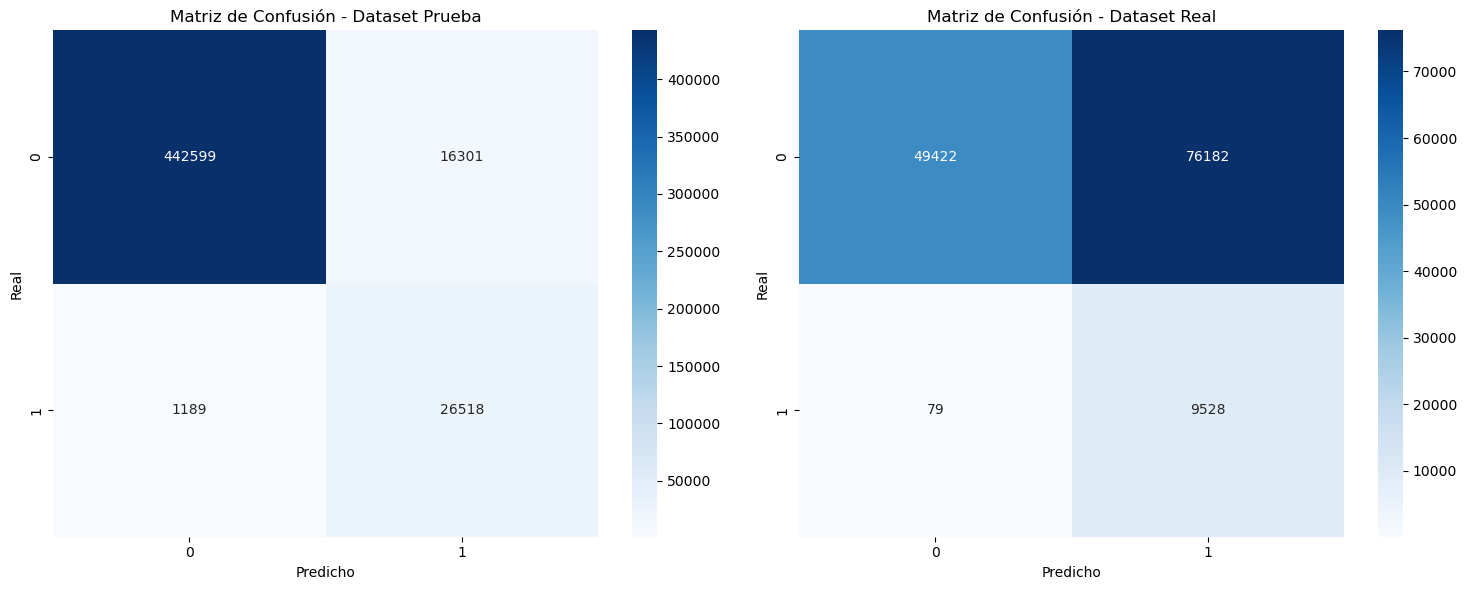

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    recall_score,
    f1_score,
    accuracy_score,
    precision_score,
    confusion_matrix,
    roc_curve
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular métricas
def calcular_metricas(modelo, X, y):
    y_pred = modelo.predict(X)
    y_pred_proba = modelo.predict_proba(X)[:, 1]
    
    roc_auc = roc_auc_score(y, y_pred_proba)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    
    return {
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4),
        'ROC-AUC': round(roc_auc, 4)
    }

# Cargar datasets
df_mora_prestamos_original = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos2.csv')
nuevo_dataset = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamos_202401.csv')

# Separar características y variable objetivo
X_original = df_mora_prestamos_original.drop('Morosidad', axis=1)
y_original = df_mora_prestamos_original['Morosidad']
X_nuevo = nuevo_dataset.drop('Morosidad', axis=1)
y_nuevo = nuevo_dataset['Morosidad']

# Asegurar nombres consistentes
X_original.columns = X_original.columns.str.replace(' ', '_')
X_nuevo.columns = X_nuevo.columns.str.replace(' ', '_')

# Dividir datos del dataset original
X_train, X_test, y_train, y_test = train_test_split(
    X_original, y_original, test_size=0.3, stratify=y_original, random_state=42
)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_nuevo_scaled = scaler.transform(X_nuevo)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Configurar y entrenar modelo con los mejores hiperparámetros
modelo = LogisticRegression(
    C=1,
    class_weight='balanced',
    fit_intercept=True,
    max_iter=100,
    penalty='l1',
    solver='liblinear',
    random_state=42
)

print("Entrenando Regresión Logística con los mejores hiperparámetros...")
modelo.fit(X_train_balanced, y_train_balanced)

# Calcular métricas en conjunto de prueba original
metricas_test = calcular_metricas(modelo, X_test_scaled, y_test)

# Calcular métricas en nuevo dataset
metricas_nuevo = calcular_metricas(modelo, X_nuevo_scaled, y_nuevo)

# Comparar métricas
comparacion_metricas = pd.DataFrame({
    'Métrica': list(metricas_test.keys()),
    'Dataset Prueba (Original)': list(metricas_test.values()),
    'Dataset Real': list(metricas_nuevo.values()),
    'Desvío': [
        round(abs(metricas_test[m] - metricas_nuevo[m]), 4) for m in metricas_test
    ]
})

# Mostrar resultados
print("\nComparación de Métricas entre Dataset Prueba (Original) y Dataset Real:")
print(comparacion_metricas)

# Visualizar comparación
plt.figure(figsize=(12, 6))
sns.barplot(
    data=comparacion_metricas.melt(id_vars='Métrica', 
                                  value_vars=['Dataset Prueba (Original)', 'Dataset Real']),
    x='Métrica', 
    y='value', 
    hue='variable',
    palette=['skyblue', 'lightgreen']
)

plt.title("Comparación de Métricas - Regresión Logística", fontsize=14, pad=20)
plt.ylabel("Valor de la Métrica", fontsize=12)
plt.xlabel("Métrica", fontsize=12)
plt.legend(title="Dataset", title_fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('comparacion_metricas_lr.png')
plt.show()

# Matrices de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Dataset de prueba
sns.heatmap(confusion_matrix(y_test, modelo.predict(X_test_scaled)), 
            annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de Confusión - Dataset Prueba')
ax1.set_ylabel('Real')
ax1.set_xlabel('Predicho')

# Dataset nuevo
sns.heatmap(confusion_matrix(y_nuevo, modelo.predict(X_nuevo_scaled)), 
            annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Matriz de Confusión - Dataset Real')
ax2.set_ylabel('Real')
ax2.set_xlabel('Predicho')

plt.tight_layout()
plt.savefig('matrices_confusion_lr.png')
plt.show()

# Guardar resultados
comparacion_metricas.to_csv('resultados_regresion_logistica.csv', index=False)